# Clasificación de texto y k-means

In [ ]:
import nltk
nltk.download('stopwords')

In [92]:
# librerías para procesar
import numpy as np
import pandas as pd

# expresiones regulares
import re

# librerías para graficar
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# librería de PLN en español
from nltk.corpus import stopwords
stopwords_sp = stopwords.words('spanish')

from nltk.stem.snowball import SnowballStemmer
spanishStemmer=SnowballStemmer("spanish")

# Count vectorizer usando NLTK
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_distances

# Algunos elementos de preprocesamiento: escalamiento y selección de k en k-means
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

# Para los algotitmos de machine learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.decomposition import PCA

#Para omitir los warnings
import warnings
warnings.filterwarnings("ignore")

# Agrupamiento de K-medias

Tomado de [Joaquin](https://rpubs.com/Joaquin_AR/310338) y de [Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) y [Comparacion](https://scikit-learn.org/stable/modules/clustering.html)  y [GIF](https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/)

 El método K-means clustering (MacQueen, 1967) agrupa las observaciones en K clusters distintos, donde el número K lo determina el analista antes de ejecutar del algoritmo. K-means clustering encuentra los K mejores clusters, entendiendo como mejor cluster aquel cuya varianza interna (within-cluster variation) sea lo más pequeña posible. Se trata por lo tanto de un problema de optimización, en el que se reparten las observaciones en K clusters de forma que la suma de las varianzas internas de todos ellos sea lo menor posible. Para poder solucionar este problema es necesario definir un modo de cuantificar la varianza interna.

El k-means clustering es uno de los algoritmos de agrupamiento más simples y más utilizados. Es de los métodos no supervisado para dividir un conjunto de individuos (registros del Dataset) en un conjunto de $k$ grupos (es decir, ***$k$ clusters***), donde $k$ representa el número de grupos preestablecidos. Este algoritmo busca que los objetos ***dentro del mismo cluster*** sean lo más similares posibles (es decir, alta similitud intraclase), mientras que ***distintos clusters*** sean lo más diferente posible (es decir, baja similitud entre clases).

En el $k$-means clustering, cada grupo está representado por su centro (es decir, ***centroide***) que corresponde a la media de puntos asignados al ***cluster***.

 La varianza interna de cada grupo se puede tratar de diferentes maneras [Varianza](https://www.vlfeat.org/api/kmeans-fundamentals.html)

**Algoritmo de  k -means**

El primer paso cuando se usa el algoritmo es indicar el número  k  de clusters que se desean obtener. El algoritmo comienza seleccionando aleatoriamente  k  objetos del conjunto de datos para que sirvan como centroides iniciales de los cluster. 

Seguido, cada uno de los registros restantes se asigna a su centroide más cercano (asignación de cluster), donde más cercano se asigna por la distacia euclideana. 

Después del paso de asignación, el algoritmo calcula el nuevo centroide de cada cluster (actualización del centroide). Ahora que los centroides se han vuelto a calcular, para cada observación se verifican las distancias para determinar si podría estar más cerca a un clúster diferente. 

Todos los objetos se reasignan nuevamente utilizando el centroide actualizado del clúster. 

Los pasos de asignación de cluster y actualización del centroide se repiten iterativamente hasta que las asignaciones de clústeres dejan de cambiar (se logra la convergencia), es decir, los clusters formados en la iteración actual son los mismos que los obtenidos en la iteración anterior.

***El algoritmo d $k$-means se puede resumir de la siguiente manera:***

1. Especifique el número de cluster ($k$) que se crearán.

2. Seleccione aleatoriamente $k$ registros del conjunto de datos como centroides de los clusters iniciales.

3. Asigna cada registro a su ***centroide*** más cercano, basado en alguna distancia.

4. Para cada uno de los $k$ clusters, se actualiza el ***centroide del cluster***.

5. Iterar los pasos 3 y 4 hasta que las asignaciones de los ***clusters*** dejen de cambiar o el número máximo de
iteraciones se alcanza.

***Se asume que entre los individuos se puede establecer una distancia euclidiana.***

La idea básica detrás de $k$-means clustering consiste en definir grupos de modo que el total de la variación ***intra-cluster*** se minimize (conocida como ***inertia, within-cluster sum-of-squares criterion, o within-cluster variation***).

El algoritmo estándar define la variación ***intra-cluster*** como la suma de las distancias al cuadrado (euclidiana) al centroide y los elementos del cluster:

$$W(C_k) = \sum_{x_i \in C_{k}}||x_i -\mu_k||^2$$

• $x_i$ es un registro que pertence al cluster $C_k$.

• $\mu_k$ es el valor promedio de los registros asignados al cluster $C_k$

Cada registro ($x_i$) se asigna a un cluster de tal forma que la suma de los cuadrados de la distancia de la observación a sus ***centroides*** $\mu_k$ sea mínimo.

Definimos la ***inercia*** o ***within-cluster sum-of-squares*** como sigue:

$$WCSS =\sum_{n=1}^{k} W(C_n)= \sum_{n=1}^{k} \sum_{x_i \in C_{n}}||x_i -\mu_n||^2$$

El algoritmo $k$-means tiene como objetivo elegir ***centroides*** que minimicen la ***inercia***. Esto mide la compacidad (es decir _goodness_) del agrupamiento, se desea que sea lo mas baja posible.

El problema se puede formular como

$$ \min_{C} E(\mu_n) = \min_{C} \sum \limits_{i=1}^{k} \sum \limits_{x_i \in C_n} \|x_i -\mu_n \|^2$$

donde $C$ es el conjunto de satos cuyos elementos son los objetos $x_i$ representados por vectores, donde cada uno de sus elementos represneta una característica o atributo. Tenemos $k$ clusters o grupos con su correspondiente centroide $\mu_n$.

En cada actualización de los centroides, desde el punto de vista matemático, debemos poner una condición necesaria de extremo a la función $E(\mu_i)$

$$\dfrac{\partial E}{\partial \mu_n}=0$$

se puede demostrar que:

$$\mu_i^{(t+1)} = \dfrac{1}{|C_i^{(t)}| \sum \limits_{x_j \in C_i^{(t)}}x_j}$$

y se toma el promedio de los elementos de cada grupo como el nuevo centroide.


within= [] ## Elbow Graph (codo), se tiende a elegir muchos grupos
for k in range(1,10):
    kmeanModel = KMeans(n_clusters=k).fit(nuevosACP)
    within.append(kmeanModel.inertia_)
fig=px.line(x=list(range(1,10)), y=within)
fig.show()

In [ ]:
within= [] ## Elbow Graph (codo), se tiende a elegir muchos grupos
for k in range(1,10):
    kmeanModel = KMeans(n_clusters=k).fit(nuevosACP)
    within.append(kmeanModel.inertia_)
fig=px.line(x=list(range(1,10)), y=within)
fig.show()

## ***¿Cuántos cluster debemos seleccionar?***

Determinar el número óptimo de clusters en un Dataset es un problema fundamental en el agrupamiento. En $k$-means se requiere especificar de antemano el número de clústeres $k$ que se generarán.

Desafortunadamente no hay una respuesta definitiva a esta pregunta. El número óptimo de clusters es algo subjetivo y depende del método utilizado para medir
similitudes y los parámetros utilizados para la partición.

Vamos a describir diferentes métodos para determinar el número óptimo de clusters para $k$-means. Estos métodos incluyen métodos directos y métodos de prueba estadísticos:

1. Métodos directos: consiste en optimizar un criterio, como el ***WCSS*** o la silueta media. Los métodos se denominan ***elbow method*** y ***silhouette***, respectivamente.

2. Métodos estadísticos de contraste: consiste en comparar la evidencia contra la hipótesis nula. Un ejemplo es la estadística de [***GAP***]().

### ***Método del codo.***


La idea básica detrás de los método $k$-means, es definir clusters tales que ***WCSS*** se minimiza. Recordemos que ***WCSS*** mide la compacidad del agrupamiento y queremos que sea lo más pequeño posible.

El método codo analiza el ***WCSS*** como una función del número de clusters. Se debe elegir una cantidad de clusers de tal forma que agregar otro cluster no mejore mucho el valor ***WCSS***.

El número óptimo de clústeres se puede definir de la siguiente manera:

1. Calcule el algoritmo de clustering $k$-means para diferentes valores de $k$. Puede variar $k$ de 1 a 10 grupos.

2. Para cada $k$, calcule ***WCSS***.

3. Trazar la curva de ***WCSS*** según el número de clusters $k$.

4. La ubicación de una curva (codo) en el plot generalmente se considera como un indicador del número adecuado de clusters.

Tenga en cuenta que el método del codo a veces es ambiguo.

El método del codo utiliza la distancia media de las observaciones a su centroide. Es decir, se fija en las distancias intra-cluster. Cuanto más grande es el número de clusters $k$, la varianza intra-cluster tiende a disminuir. Cuanto menor es la distancia intra-cluster mejor, ya que significa que los clústers son más compactos. El método del codo busca el valor k que satisfaga que un incremento de k, no mejore sustancialmente la distancia media intra-cluster.
[ver](https://machinelearningparatodos.com/segmentacion-utilizando-k-means-en-python/)


<center><img src="https://github.com/Fabian830348/cursos/blob/a78eef65f7afa2e9096475bf1860843870f52276/Imagen/elbow.png?raw=true" alt="centered image" width="400" height="250"></center>

Este método utiliza los valores de la inercia obtenidos tras aplicar el K-means a diferente número de Clusters (desde 1 a N Clusters), siendo la inercia la suma de las distancias al cuadrado de cada objeto del Cluster a su centroide:

$$inercia = \sum \limits_{k=0}^{n} \|x_k-\mu \|^2$$

Una vez obtenidos los valores de la inercia tras aplicar el K-means de 1 a N Clusters, representamos en una gráfica lineal la inercia respecto del número de Clusters. En esta gráfica se debería de apreciar un cambio brusco en la evolución de la inercia, teniendo la línea representada una forma similar a la de un brazo y su codo. El punto en el que se observa ese cambio brusco en la inercia nos dirá el número óptimo de Clusters a seleccionar para ese data set; o dicho de otra manera: el punto que representaría al codo del brazo será el número óptimo de Clusters para ese data set.





# Ejemplo 1. kmeans.

Vamos a importar los siguientes datos

In [24]:
url_base = "https://raw.githubusercontent.com/lacamposm/Metodos_Estadisticos/main/data/"
USArrests = pd.read_csv(url_base + "USArrests.csv", index_col=0)
USArrests.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


Escalamos los datos

In [29]:
## Escalamos la información.
scaler = StandardScaler()
scaler.fit(USArrests)
##
df = pd.DataFrame(scaler.transform(USArrests), 
                  columns = USArrests.columns, 
                  index = USArrests.index)
df.head(6)

,Murder,Assault,UrbanPop,Rape
Alabama,1.255179,0.790787,-0.526195,-0.003451
Alaska,0.513019,1.118060,-1.224067,2.509424
Arizona,0.072361,1.493817,1.009122,1.053466
Arkansas,0.234708,0.233212,-1.084492,-0.186794
California,0.281093,1.275635,1.776781,2.088814
Colorado,0.025976,0.402909,0.869548,1.883901


Aplicar el algotitmo *kmeans* con dos clusters

In [30]:
n = 2
kmeans = KMeans(n_clusters=n,                  ### Número de clusters
                random_state=0)                ### Semilla aleatoria.
kmeans.fit(df)   

KMeans(n_clusters=2, random_state=0)

Revisamos los atributos, es decir, la inercia y los centroides.

In [31]:
## Atributos.
print(kmeans.inertia_)
print(kmeans.cluster_centers_)

104.96163315756871
[[-0.67675778 -0.68274685 -0.13306084 -0.57037591]
 [ 1.01513667  1.02412028  0.19959126  0.85556386]]


Los coloco como un data.frame

In [32]:
centroides = pd.DataFrame(kmeans.cluster_centers_, columns = df.columns)
centroides

,Murder,Assault,UrbanPop,Rape
0,-0.676758,-0.682747,-0.133061,-0.570376
1,1.015137,1.024120,0.199591,0.855564


Podemos graficar lo centroides

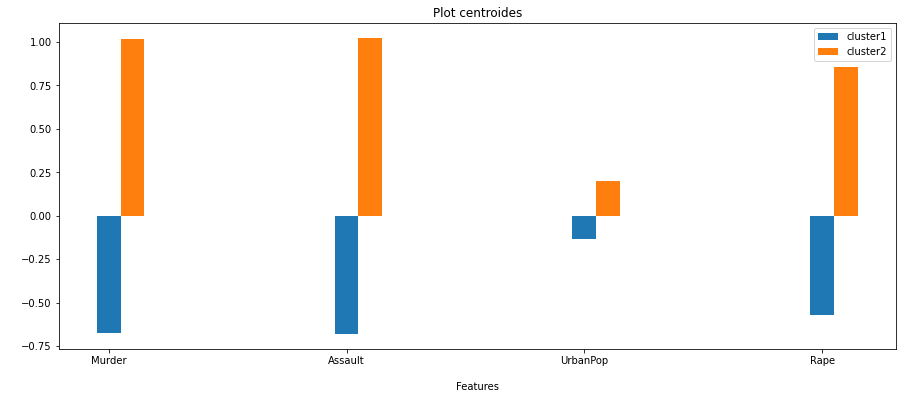

In [34]:
## Plot centroides.
plt.rcParams["figure.figsize"] = (15,6)
temp = centroides.iloc[0:4,0:5]
temp.index = ["cluster1","cluster2"]
X_axis, a = np.arange(len(temp.columns)), np.flip(np.arange(-0.1,0.1,0.1))
##
for i,index in enumerate(temp.index):
  plt.bar(X_axis -1*a[i], temp.loc[index],width=0.1, label = index)
plt.xticks(X_axis,temp.T.index)
plt.xlabel("\nFeatures",)
plt.ylabel(" ",)
plt.title("Plot centroides")
plt.legend()
plt.show()

Revisamos a cuál cluster está asignando cada medición

In [35]:
## Atributos.
print(kmeans.labels_)

[1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0
 0 0 1 0 1 1 0 0 0 0 0 0 0]


In [36]:
df_cluster = USArrests.copy()
df_cluster["cluster"] = kmeans.labels_
df_cluster

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,1
Colorado,7.9,204,78,38.7,1
Connecticut,3.3,110,77,11.1,0
Delaware,5.9,238,72,15.8,0
Florida,15.4,335,80,31.9,1
Georgia,17.4,211,60,25.8,1


Veamos la media en cada uno de los clusters

In [37]:
df_cluster.groupby(by = ["cluster"]).mean()

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,4.870,114.433333,63.633333,15.943333
1,12.165,255.250000,68.400000,29.165000


Vamos a realizar una clasificación

In [45]:
X_nuevo = np.array([[13,	250,	47,	20]]) #davidguetta
new_labels = kmeans.predict(X_nuevo)
print(new_labels)

[1]


In [51]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, df)
closest

array([26, 30])

In [54]:
users=df.index
for row in closest:
    print(users[row])

Nebraska
New Mexico


Ejercicio: utilizar otro número de clusters

In [58]:
kmeans.predict(df)

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
# distancias de cada medida al centroide
kmeans.transform(df)

In [64]:
temp = pd.DataFrame(kmeans.transform(df),)
temp["cluster"] = kmeans.predict(df)
temp["cluster"] = temp["cluster"].astype("category")
temp.head(10)

,0,1,cluster
0,2.525795,1.173345,1
1,3.915857,2.241206,1
2,3.039746,1.343111,1
3,1.649881,1.992482,0
4,3.933386,2.147210,1
5,2.949777,1.694303,1
6,1.130697,3.388652,0
7,1.625288,2.072609,0
8,4.168703,1.496565,1
9,3.318037,1.495708,1


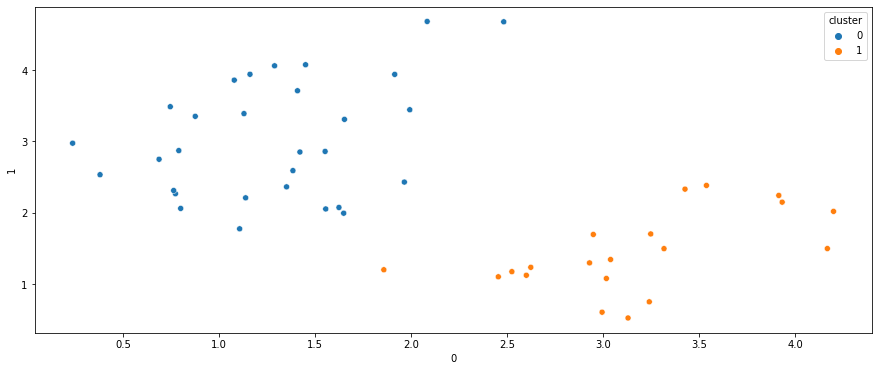

In [63]:
sns.scatterplot(data = temp,
                x = 0,
                y = 1,
                hue = "cluster")
plt.show()

# Segunda parte del ejercicio 1. Selección del número de clusters

Vamos a usar el método del codo.

Para ellos creamos una función

In [65]:
def elbow_plot(df,n=2):
  """
      Función que plotea el número de cluster vs WCSS  buscando determinar el número de cluster óptimo.
      * Input: ---> df: pd.DataFrame con quien se ajusta el algoritmo k-means.
               ---> n (int): Número de cluster a comparar. Default 2.
      * Output: None

      ** Nota: Esta función depende de sklearn-KMeans y ploty_express***
  """
  from sklearn.cluster import KMeans
  inertias = [KMeans(n_clusters=k).fit(df).inertia_ for k in range(1,n+1)]
  data_plot = pd.DataFrame({"n_clusters":range(1,n+1),"WCSS":inertias})
  
  fig = px.line(data_plot, x="n_clusters", y = "WCSS",  title = "Optimal number of clusters",
                template="plotly_white", markers=True)
  fig.update_xaxes(title_text = "Number of clusters")
  fig.update_yaxes(title_text = "WCSS")
  fig.show()
  return None

elbow_plot(df,n=10)

Según el gráfico anterior podemos usar, por ejemplo, k=4. 

### ***Coeficiente de silhouette***


El coeficiente de silueta mide qué tan bien se agrupa una observación y estima la ***distancia promedio entre clusters***. El plot de silueta muestra una medida de qué tan cerca está cada punto en un cluster de los puntos en los clusters vecinos.

Para cada observación $i$, el ancho de la silueta $s_i$ se calcula de la siguiente manera:

1. Para cada observación $i$, calculamos la disimilitud (distancia) promedio $a_i$ entre $i$ y todos los otros puntos del clúster al que pertenezca $i$.

2. Para todos los demás clusters $C$, a los que no pertenezca $i$, calcule el promedio de disimilitud $d(i,C)$ de $i$ con todos los puntos de $C$. La menor de estas $d(i,C)$ se define como $b_i = min_C\  d(i,C)$. El valor de $b_i$ puede verse como la disimilitud promedio entre $i$ y su cluster "vecino", es decir, el más cercano al que ***no*** pertenece.

3. Finalmente, el ancho de la silueta de la observación $i$ se define mediante la fórmula:
$$S_i = \frac{(b_i - a_i)}{max(a_i, b_i)}$$

El ancho de la silueta se puede interpretar de la siguiente manera:

- Las observaciones con un $S_i$ grande (casi 1) están muy bien agrupadas.

- Un $S_i$ pequeño (alrededor de 0) significa que la observación se encuentra entre dos grupos.

- Las observaciones con un $S_i$ negativo probablemente estén ubicadas en el cluster incorrecto.


El algoritmo es similar al método del codo y se puede calcular de la siguiente manera:

1. Calcule el algoritmo $k$-means  para diferentes valores de $k$. Por ejemplo, variando $k$ de 1 a 10 grupos.

2. Para cada $k$, calcule la silueta promedio de las observaciones.

3. Trazar el plot según el número de clusters y la silueta promedio.

4. La ubicación del máximo se considera como el número apropiado de clusters.

In [66]:
n = 4
kmeans1 = KMeans(n_clusters=n,                  ### Número de clusters
                random_state=0)                 ### Semilla aleatoria.
kmeans1.fit(df) 

KMeans(n_clusters=4, random_state=0)

In [67]:
print("Con 2 clusters el coeficiente de silueta es:",silhouette_score(df, kmeans.labels_))
print("Con 4 clusters el coeficiente de silueta es:",silhouette_score(df, kmeans1.labels_))

Con 2 clusters el coeficiente de silueta es: 0.4084890326217641
Con 4 clusters el coeficiente de silueta es: 0.33968891433344395


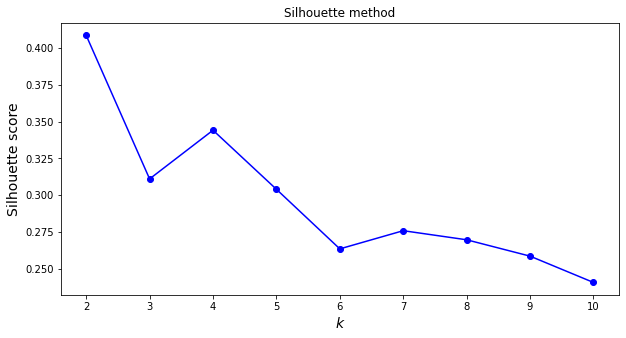

In [69]:
def plot_silhouette(df,n=2, height = 5, width = 3):
  from sklearn.metrics import silhouette_score
  from sklearn.cluster import KMeans
  models = [KMeans(n_clusters=n).fit(df) for n in range(2,n+1)]
  silhouette_scores = [silhouette_score(df, model.labels_) for model in models]
  plt.figure(figsize=(width, height))
  plt.plot(list(range(2, n+1)), silhouette_scores, "bo-")
  plt.xlabel("$k$", fontsize=14)
  plt.ylabel("Silhouette score", fontsize=14)
  plt.title("Silhouette method")
  plt.show()
  return None

plot_silhouette(df,n=10, width = 10)

### ***GAP Statistic***

Este estadístico compara, para diferentes valores de $k$, el ***WCSS*** observado frente al valor esperado acorde a una distribución uniforme de referencia. La estimación del número óptimo de clusters es el valor $k$ con el que se consigue maximizar el estadístico ***GAP***, es decir, encuentra el valor de $k$ con el que se consigue una estructura de clusters lo más alejada posible de una distribución uniforme aleatoria. Este método puede aplicarse a cualquier tipo de clustering.

El algoritmo del gap statistic method es el siguiente:

1. Hacer clustering de los datos para un rango de valores de $k$ y calcular para cada uno el valor de ***WCSS***.

2. Simular $B$ sets de datos de referencia, todos ellos con una distribución aleatoria uniforme. Aplicar clustering a cada uno de los sets con el mismo rango de valores $k$ empleado en los datos originales, calculando en cada caso $W_{kb}$. Se recomienda emplear valores de $B=500$.

3. Calcular el estadístico ***GAP*** para cada valor de $k$ como la desviación de la varianza observada ***WCSS*** respecto del valor esperado acorde a la distribución de referencia $W_{kb}$.

$$GAP(k)=\frac{1}{B}\sum_{b=1}^{B}log(W_{kb})−log(WCSS)$$

La estimación de los clústeres óptimos será el valor que maximice la estadística de ***GAP***.

In [70]:
# Gap Statistic for K means
## Tomado de 
## https://towardsdatascience.com/cheat-sheet-to-implementing-7-methods-for-selecting-optimal-number
## -of-clusters-in-python-898241e1d6ad
def optimalK(data, nrefs=3, maxClusters=10):
    """
    Calculates KMeans optimal K using Gap Statistic 
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: pd.DataFrame with the number of cluster and gap statistic.
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
# Holder for reference dispersion results
        refDisps = np.zeros(nrefs)
# For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape) 
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)            
            refDisp = km.inertia_
            refDisps[i] = refDisp
# Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)        
        origDisp = km.inertia_
# Calculate gap statistic
        gap = np.mean(np.log(refDisps)) - np.log(origDisp)
# Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)        
    return resultsdf

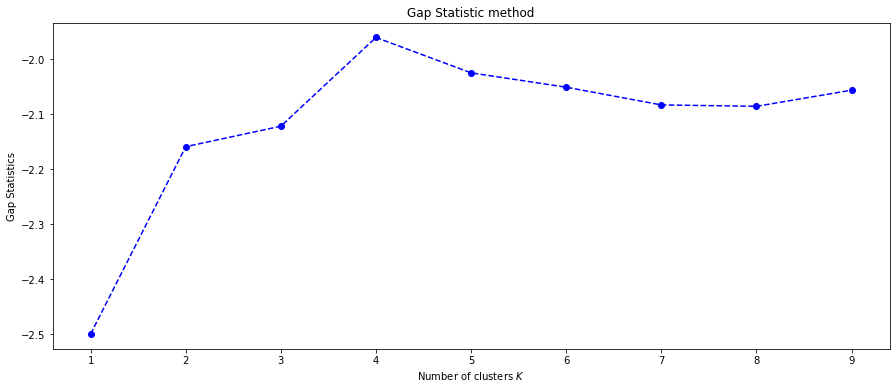

In [71]:
df1 = optimalK(df, nrefs=25,)
###
plt.plot(df1["clusterCount"], df1["gap"], linestyle="--", marker="o", color="b")
plt.xlabel("Number of clusters $K$")
plt.title("Gap Statistic method")
plt.ylabel("Gap Statistics")
plt.show()

In [72]:
## Caso 2 clusters
df_Clusters2 = USArrests.copy()
df_Clusters2["cluster"] = kmeans.labels_
df_Clusters2["cluster"] = df_Clusters2["cluster"].astype("category")
df_Clusters2.head()

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,1


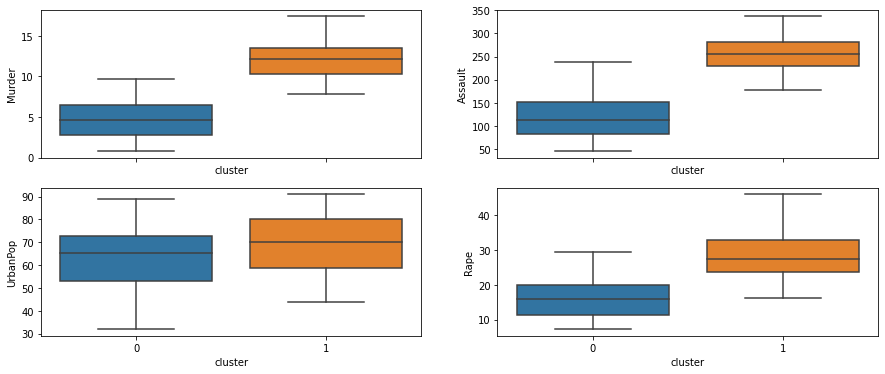

In [73]:
## Box-plots
fig, axes = plt.subplots(2,2, sharex=True)
##
sns.boxplot(data=df_Clusters2, x = "cluster", y = "Murder", ax = axes[0,0])
sns.boxplot(data=df_Clusters2, x = "cluster", y = "Assault", ax = axes[0,1])
sns.boxplot(data=df_Clusters2, x = "cluster", y = "UrbanPop", ax = axes[1,0])
sns.boxplot(data=df_Clusters2, x = "cluster", y = "Rape", ax = axes[1,1])
plt.show()

***Comentarios:***

1. El cluster 1 tiene una alta tasa delictiva y predomina la población urbana.

2. El cluster 0 tiene tasas bajas de delitos y una menor tasa que el cluster 1 de población urbana.

Note que la solución en este caso es bastante simple, pues solo está teniendo en consideración las tasas de crimenes altos con "población urbana" y tasa de crimenes bajos con "población rural". Esta solución parece ser buena, pues logra identificar los estados que tienen alto y bajo crimen.

In [74]:
n = 4
kmeans = KMeans(n_clusters=n,                  ### Número de clusters
                random_state=0)                ### Semilla aleatoria.
kmeans.fit(df)  

KMeans(n_clusters=4, random_state=0)

In [75]:
## Caso 2 clusters
df_Clusters4 = USArrests.copy()
df_Clusters4["cluster"] = kmeans.labels_
df_Clusters4.head()

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,3
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,3
California,9.0,276,91,40.6,1


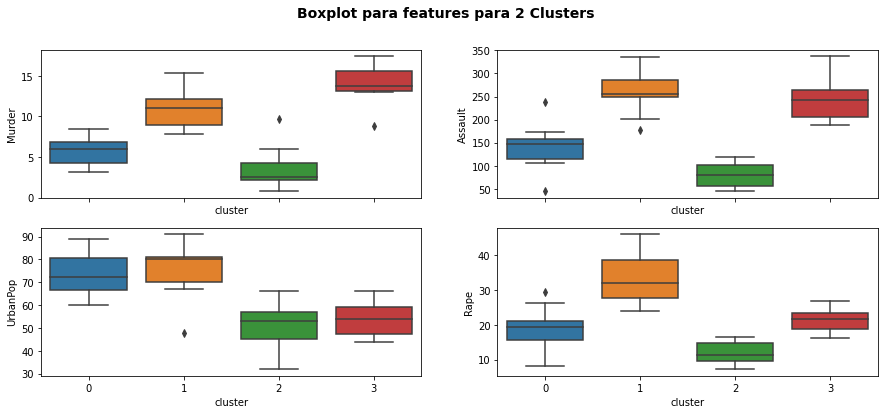

In [76]:
## Box-plots
fig, axes = plt.subplots(2,2, sharex=True)
##
sns.boxplot(data=df_Clusters4, x = "cluster", y = "Murder", ax = axes[0,0])
sns.boxplot(data=df_Clusters4, x = "cluster", y = "Assault", ax = axes[0,1])
sns.boxplot(data=df_Clusters4, x = "cluster", y = "UrbanPop", ax = axes[1,0])
sns.boxplot(data=df_Clusters4, x = "cluster", y = "Rape", ax = axes[1,1])
fig.suptitle("Boxplot para features para 4 Clusters", fontsize=14, fontweight="bold",)
plt.show()

***Comentarios:***

1. El cluster 3 tiene alto el índice de asesinatos. El cluster 2 tiene un menor índice de asesinatos.

2. `Assault` y `Murder` tiene un comportamiento similar para los clusters.

4. Note que el cluster 1 tiene una tasa más alta de asaltos que el cluster 3. A su vez el cluster 3 tiene más asesinatos. Los clusters 0 y 2 tiene un compartamiento similar en ambas features (`Assault` y `Murder`).

5. En cuanto a `UrbanPop` el cluster 0 y tienen cluster 1 tiene las tasas más altas. Por su supuesto los individuos en los cluster 2 y 3 tiene una tasa baja de población urbana.

Note que podemos caracterizar los cluster así:

- ***Cluster 0:*** Baja tasa de delitos, y una alta tasa de población urbana.

- ***Cluster 1.*** Alta tasa en todas las features.

- ***Cluster 2.*** Baja tasa en todas las features.

- ***Cluster 3.*** Alta tasa de `Murder` y `Assault` con baja tasa de población urbana y violaciones.

Esta solución parece ser buena, en este caso podemos pensar en una segmentación basados en la feature `UrbanPop`, note que acá tenemos más información que con 2 clusters.

# Ejemplo 2. Clustering para review en PLN

Primero, cargamos los datos

In [77]:
url= "https://raw.githubusercontent.com/Fabian830348/Bases_Datos/master/reviews.csv"

In [83]:
base = pd.read_csv(url)
base.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games


Luego vamos a normalizar los datos, es decir, vamos a preprocesar el texto

- minúsculas

- caracteres

- stopwords

In [84]:
from nltk.corpus import stopwords
stopwords_sp = stopwords.words('spanish')

In [85]:
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = [palabra for palabra in texto.split() if palabra not in stopwords_sp]
    texto = " ".join(texto)
    return texto

Luego de tener el texto normalizado, procedemos a generar la matriz numérica que representa el texto. 

Para este caso usaremos **TfidfVectorizer**

In [86]:
tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)
tfidf = tfidf_vect.fit_transform(base.review_body.values)
tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns = tfidf_vect.get_feature_names_out())
tfidf_matrix

,abajo,abalorio,abalorios,abaratar,abate,abierta,abierto,ablar,aboné,abre,...,éste,éxito,ópticas,última,últimas,últimos,única,únicamente,único,útil
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
def elbow_plot(df,n=2):
  """
      Función que plotea el número de cluster vs WCSS  buscando determinar el número de cluster óptimo.
      * Input: ---> df: pd.DataFrame con quien se ajusta el algoritmo k-means.
               ---> n (int): Número de cluster a comparar. Default 2.
      * Output: None

      ** Nota: Esta función depende de sklearn-KMeans y ploty_express***
  """
  from sklearn.cluster import KMeans
  inertias = [KMeans(n_clusters=k).fit(df).inertia_ for k in range(1,n+1)]
  data_plot = pd.DataFrame({"n_clusters":range(1,n+1),"WCSS":inertias})

  fig = px.line(data_plot, 
                x="n_clusters", 
                y = "WCSS", 
                title = "Número óptimo de clusters",
                template="plotly_white", 
                markers=True)
  fig.update_xaxes(title_text = "Número de clusters")
  fig.update_yaxes(title_text = "WCSS: Within-Cluster Distance to Centroid")
  fig.show()
  return None

elbow_plot(tfidf_matrix,n=25)

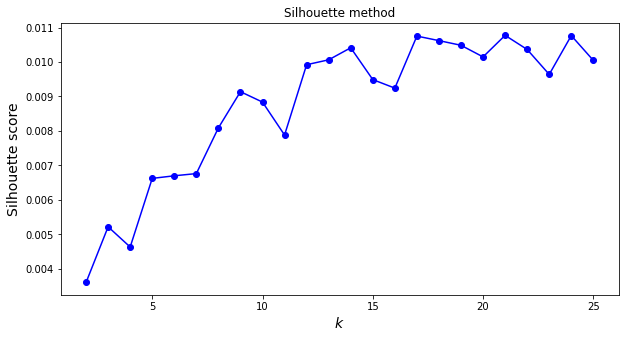

In [89]:
def plot_silhouette(df,n=2, height = 5, width = 3):
  from sklearn.metrics import silhouette_score
  from sklearn.cluster import KMeans
  models = [KMeans(n_clusters=n).fit(df) for n in range(2,n+1)]
  silhouette_scores = [silhouette_score(df, model.labels_) for model in models]
  plt.figure(figsize=(width, height))
  plt.plot(list(range(2, n+1)), silhouette_scores, "bo-")
  plt.xlabel("$k$", fontsize=14)
  plt.ylabel("Silhouette score", fontsize=14)
  plt.title("Silhouette method")
  plt.show()
  return None

plot_silhouette(tfidf_matrix, n=25, width = 10)

In [90]:
k = 19
model = KMeans(n_clusters=k)
model.fit(tfidf_matrix)

KMeans(n_clusters=19)

In [91]:
base['cluster'] = model.labels_
base[["review_body" , "cluster"]]

,review_body,cluster
0,"Buen. Buena calidad, y buena presentación.",7
1,"Un producto a perfecto, para salir de casa con...",15
2,No funciona con Nintendo Switch. No hay forma ...,8
3,"Recomendado, los utilizo para pc y no me dan n...",14
4,El cable funciona bien podria ser un poco mas ...,14
...,...,...
995,En la foto parece que la cadena sea más gruesa...,14
996,"Bien por su precio, la cadena demasiado fina.",14
997,Muy bien!! Ahora tengo organizados los pendien...,14
998,"Las tapas para los joystics no están nada mal,...",0


In [93]:
nbrs = NearestNeighbors(n_neighbors=3, metric='euclidean').fit(tfidf_matrix.values)

clust_cnt = base['cluster'].value_counts()
clust_cnt_pct = base['cluster'].value_counts(normalize=True)

centroids = model.cluster_centers_

terms = tfidf_vect.get_feature_names_out()
order_centroids = centroids.argsort()[:, ::-1]

for i in range(k):
    print(f"Cluster # {i}")
    print(f"Tiene {clust_cnt[i]} registros ({clust_cnt_pct[i]:.2%} de los datos)")
    print()
    
    print("TÉRMINOS MÁS REPRESENTATIVOS")
    for ind in order_centroids[i][:20]:
        print(terms[ind], end=" ")
    print()
    print()
    
    print(f"DOCUMENTOS MÁS REPRESENTATIVOS")
    for vecino in base.iloc[nbrs.kneighbors([centroids[i]])[1][0]].review_body.values:
        print(f" *** {vecino}")
        print()
        
    print()
    print("********************************************")
    print()

Cluster # 0
Tiene 237 registros (23.70% de los datos)

TÉRMINOS MÁS REPRESENTATIVOS
esperaba si aunque foto ps calidad color buen bastante recibido precio mal fina mejor diseño parece llegó queda demasiado amazon 

DOCUMENTOS MÁS REPRESENTATIVOS
 *** Esta bien aunque no es lo que esperaba y el material es de baja calidad, no lo recomiendo .... ...

 *** Buen regalo, preciosa. Brilla bastante y parece que es de calidad.Espero que no cambie de color ni pierda piedras.Lo recomiendo

 *** No me ha gustado nada. Los colores son muy pálidos. El que yo he recibido no tiene nada que ver con el de la foto. Esperaba otra cosa.


********************************************

Cluster # 1
Tiene 35 registros (3.50% de los datos)

TÉRMINOS MÁS REPRESENTATIVOS
plata tamaño gustado bonito regalo si favorecedores bonitos pendientes perfecto diseño quedan compré enseguida cómodos agradece pequeños pulsera rompió mujer 

DOCUMENTOS MÁS REPRESENTATIVOS
 *** Muy bonito, Estaba preocupado por si eran muy gra

Si queremos hacer una predicción

In [97]:
test = ["Necesitas el juego inicial para eso", "Preciosos estos aretes, buena calidad"]
nuevosDatos = tfidf_vect.transform(test)
for i in model.predict(nuevosDatos):
    print(f"Cluster {i}")

Cluster 11
Cluster 7


Para optimizar por el método Gap 

In [98]:
def optimalK(data, nrefs=3, maxClusters=15):
    """
    Calculates KMeans optimal K using Gap Statistic from Tibshirani, Walther, Hastie
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):

        # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)

        # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp

        # Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_

        # Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)

        # Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)

    return (gaps.argmax() + 1, resultsdf)  # Plus 1 because index of 0 means 1 cluster is optimal, index 2 = 3 clusters are optimal

In [99]:
k, gapdf = optimalK(tfidf_matrix, nrefs=5, maxClusters=20)
print(k)

17


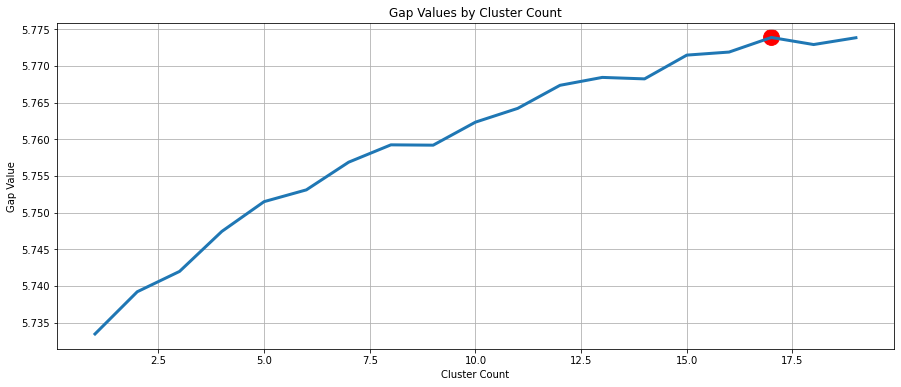

In [100]:
plt.plot(gapdf.clusterCount, gapdf.gap, linewidth=3)
plt.scatter(gapdf[gapdf.clusterCount == k].clusterCount, gapdf[gapdf.clusterCount == k].gap, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
import plotly.graph_objs as go
from plotly.offline import iplot

pca = PCA(n_components=2)

result = pca.fit_transform(tfidf_matrix)
result = pd.DataFrame(result)
result.columns = ['X', 'Y']
result['cluster'] = base.cluster.values
result['texto'] = base.review_body.apply(lambda val: val[:140])

colorsIdx = {0: 'blue',
             1: 'yellow',
             2: 'green',
             3:'#636EFA',
             4:'#EF553B',
             5:'#00CC96',
             6:'#AB63FA',
             7:'#FFA15A',
             8:'#19D3F3',
             9:'#FF6692',
             10:'#B6E880',
             11:'#FF97FF',
             12:'#FECB52',
             13:'#CCFFCC',
             14:'#C0C0C0',
             15:'#00FFB3',
             16: 'red'}

result['colores'] = result['cluster'].map(colorsIdx)


In [ ]:
trace = go.Scatter(x=result['X'].values,
                   y=result['Y'].values,
                   text=result['texto'].values,
                   mode='markers',
                   marker=dict(color=result['colores'].values)) 

layout = go.Layout(title="PCA")

fig = go.Figure(data=trace, layout=layout)
iplot(fig)